# *Jay Bhanushali* - ***60009200047***
---
# Lab 7: **Vector AutoRegressive Model**

Vector AutoRegressive (VAR) is a multivariate forecasting algorithm that is used when two or more time series influence each other.

VAR is a bidirectional model.

In a bidirectional model, variables influence each other.

The VAR (1) model with two time series (Y1 and Y2):

**Ŷ`1,t` = μ`1` + ϕ`11`Y`1,t-1` + ϕ`12`Y`1,t-2` + ɛ`1,t`**

**Ŷ`2,t` = μ`2` + ϕ`21`Y`2,t-1` + ϕ`22`Y`2,t-2` + ɛ`2,t`**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn import metrics
from timeit import default_timer as timer
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv(r'/content/Microsoft_Stock.csv', parse_dates= True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [ ]:
df.Date = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1511 non-null   datetime64[ns]
 1   Open    1511 non-null   float64       
 2   High    1511 non-null   float64       
 3   Low     1511 non-null   float64       
 4   Close   1511 non-null   float64       
 5   Volume  1511 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 71.0 KB


In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2015-04-01,40.60,40.76,40.31,40.72,36865322
1,2015-04-02,40.66,40.74,40.12,40.29,37487476
2,2015-04-06,40.34,41.78,40.18,41.55,39223692
3,2015-04-07,41.61,41.91,41.31,41.53,28809375
4,2015-04-08,41.48,41.69,41.04,41.42,24753438


In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

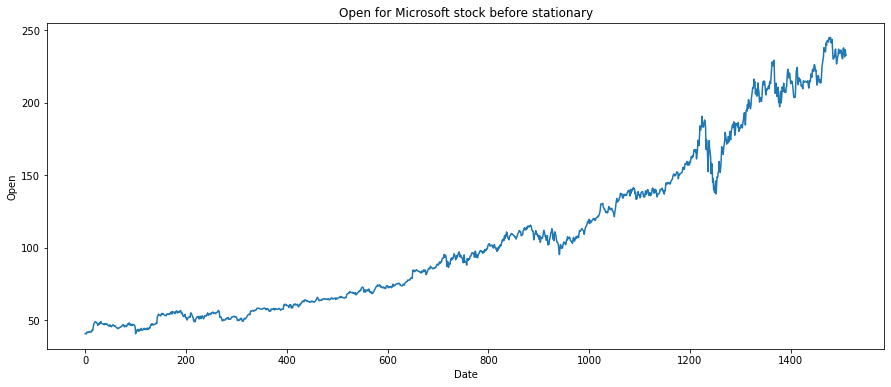

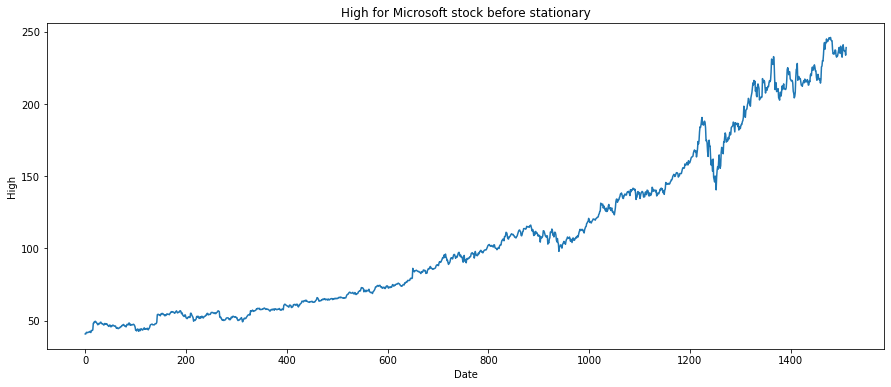

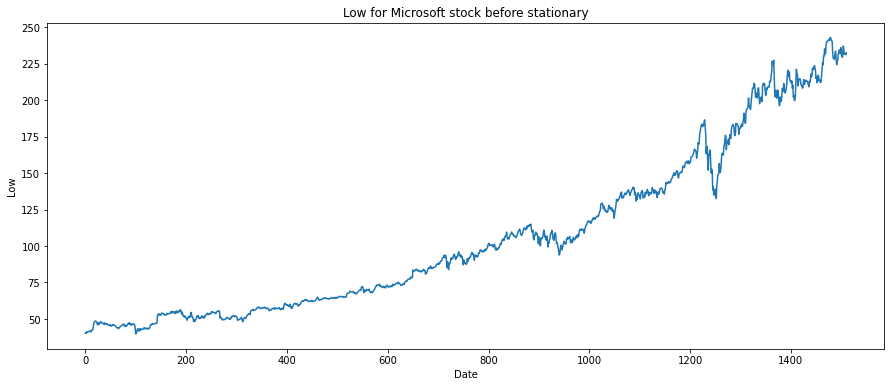

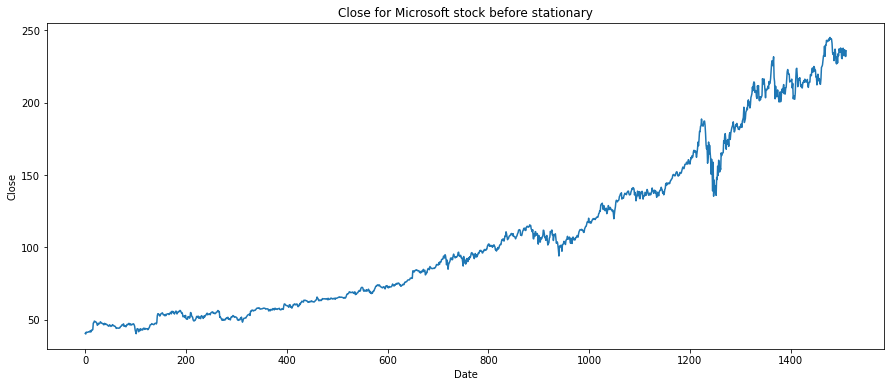

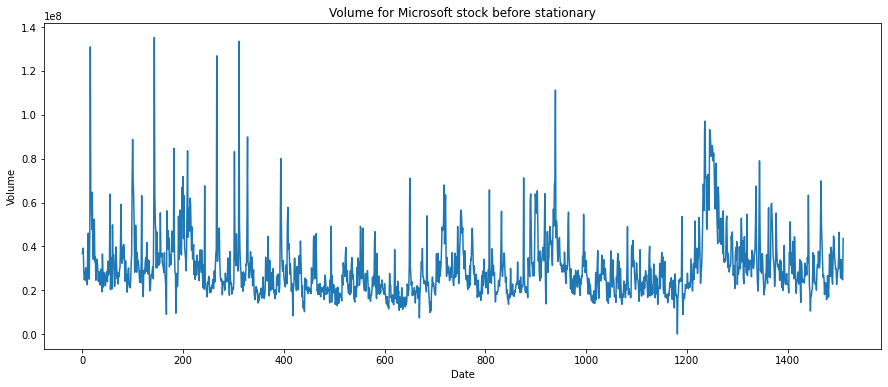

In [ ]:
for col in df.columns[1:]:
  df[col].plot(figsize=(15, 6))
  plt.xlabel("Date")
  plt.ylabel(col)
  plt.title(f"{col} for Microsoft stock before stationary")
  plt.show()

The following loop will plot a histogram and KDE for all the columns before making it stationary:

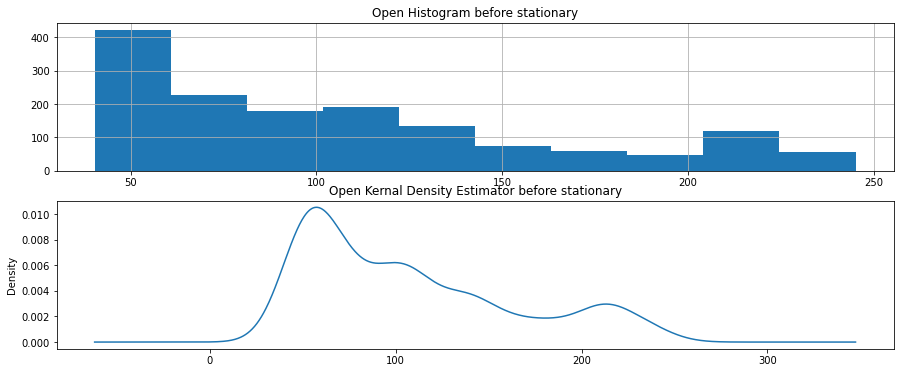

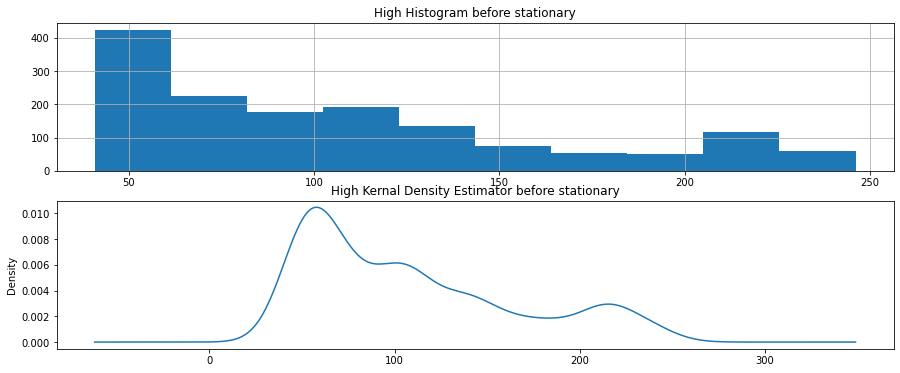

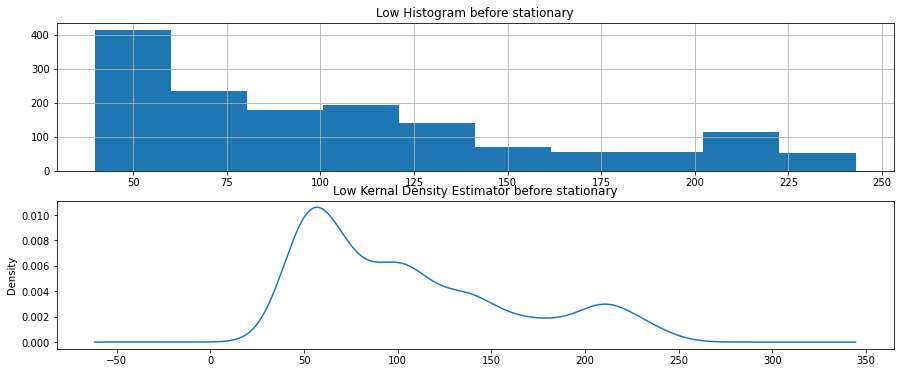

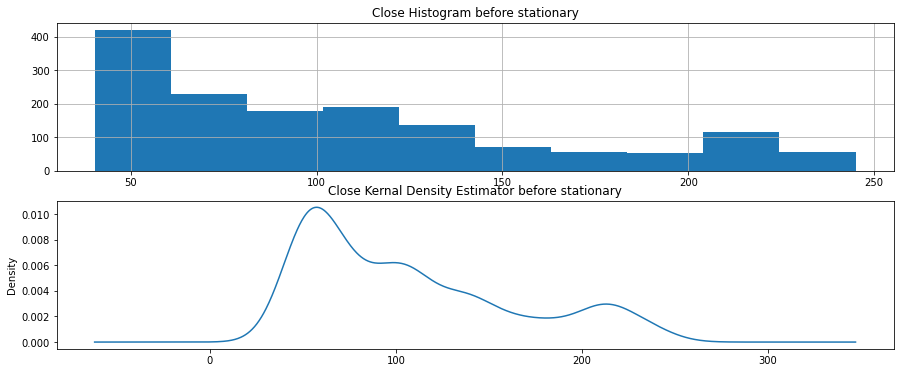

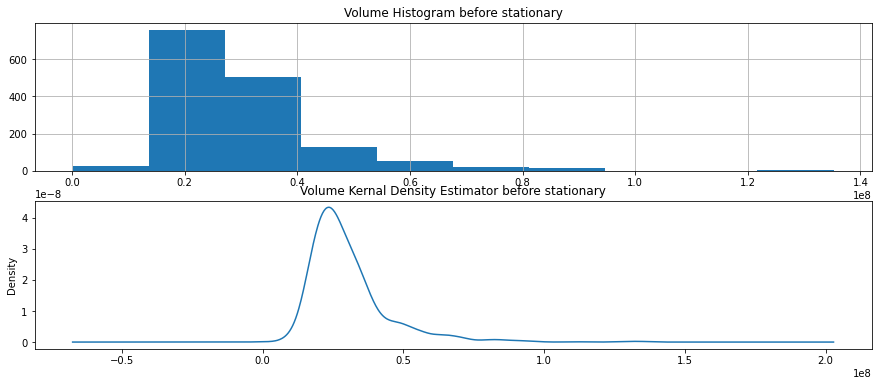

In [ ]:
for col in df.columns[1:]:
  plt.figure(1, figsize=(15,6))
  plt.subplot(211)
  plt.title(f"{col} Histogram before stationary")
  df[col].hist()
  plt.subplot(212)
  df[col].plot(kind='kde')
  plt.title(f"{col} Kernal Density Estimator before stationary")
  plt.show()

Define a time-series evaluation function, as shown below:

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
    return 

Here is the ADF test function to check for stationary data:

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

Here is how to check whether the variables are stationary:

In [ ]:
for col in df.columns[1:]:
  Augmented_Dickey_Fuller_Test_func(df[col],col)
  print('\n')

Results of Dickey-Fuller Test for column: Open
Test Statistic                    0.823915
p-value                           0.992013
No Lags Used                      2.000000
Number of Observations Used    1508.000000
Critical Value (1%)              -3.434694
Critical Value (5%)              -2.863459
Critical Value (10%)             -2.567791
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: High
Test Statistic                    1.570419
p-value                           0.997766
No Lags Used                     14.000000
Number of Observations Used    1496.000000
Critical Value (1%)              -3.434729
Critical Value (5%)              -2.863474
Critical Value (10%)             -2.567800
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: Low
Test Statistic                    1.224828
p-value                        

Except for Volume column all others are non stationary hence wee need to apply first differencing on them to make them stationary

In [ ]:
stat_df = df.copy()
for col in ['Open','High','Low','Close']:
  stat_df[col] = df[col].diff()

In [ ]:
stat_df.head()

,Date,Open,High,Low,Close,Volume
0,2015-04-01,NaN,NaN,NaN,NaN,36865322
1,2015-04-02,0.06,-0.02,-0.19,-0.43,37487476
2,2015-04-06,-0.32,1.04,0.06,1.26,39223692
3,2015-04-07,1.27,0.13,1.13,-0.02,28809375
4,2015-04-08,-0.13,-0.22,-0.27,-0.11,24753438


Dropping null values after applying differencing

In [ ]:
stat_df.dropna(axis=0,inplace=True)
stat_df.head()

,Date,Open,High,Low,Close,Volume
1,2015-04-02,0.06,-0.02,-0.19,-0.43,37487476
2,2015-04-06,-0.32,1.04,0.06,1.26,39223692
3,2015-04-07,1.27,0.13,1.13,-0.02,28809375
4,2015-04-08,-0.13,-0.22,-0.27,-0.11,24753438
5,2015-04-09,-0.23,-0.07,0.21,0.06,25723861


Check whether the variables are stationary after first differencing, as 
shown here:

In [ ]:
for col in stat_df.columns[1:]:
    Augmented_Dickey_Fuller_Test_func(stat_df[col],col)
    print('\n')

Results of Dickey-Fuller Test for column: Open
Test Statistic                -9.913565e+00
p-value                        3.122658e-17
No Lags Used                   2.400000e+01
Number of Observations Used    1.485000e+03
Critical Value (1%)           -3.434761e+00
Critical Value (5%)           -2.863488e+00
Critical Value (10%)          -2.567807e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: High
Test Statistic                -9.976424e+00
p-value                        2.171528e-17
No Lags Used                   2.400000e+01
Number of Observations Used    1.485000e+03
Critical Value (1%)           -3.434761e+00
Critical Value (5%)           -2.863488e+00
Critical Value (10%)          -2.567807e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: Low
Test Statistic                -1.180872e+01
p-value                        8.966572e

Create the plots after making the data stationary, as shown below:

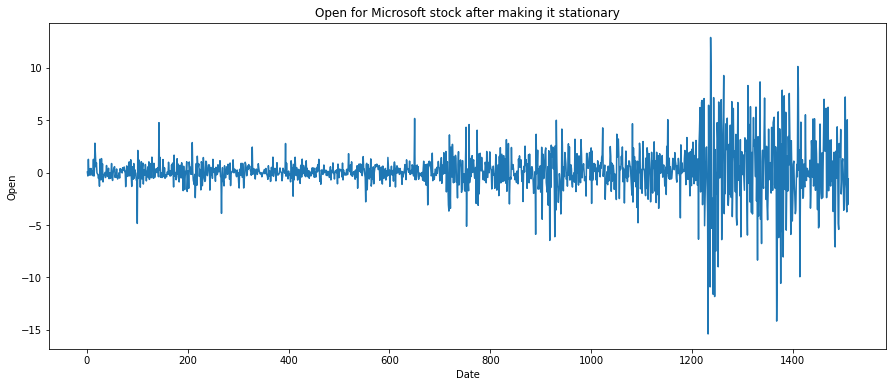

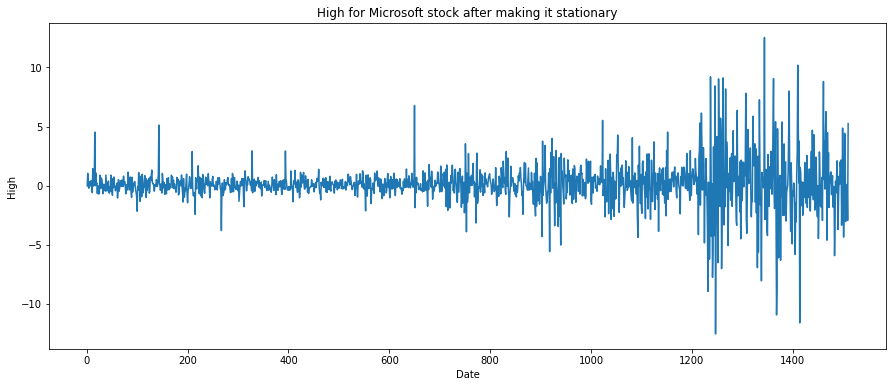

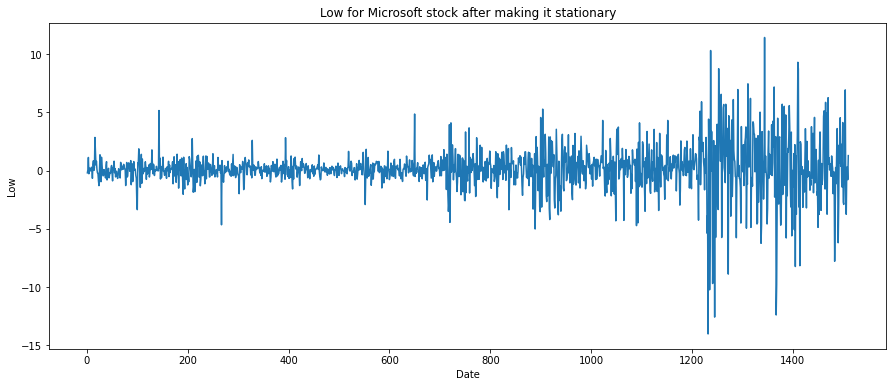

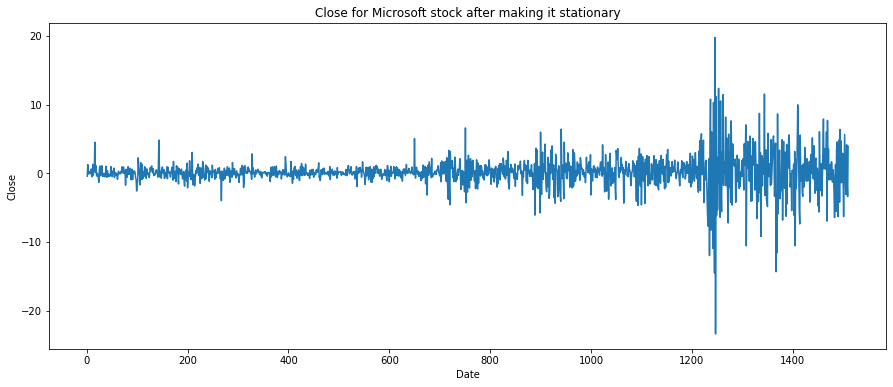

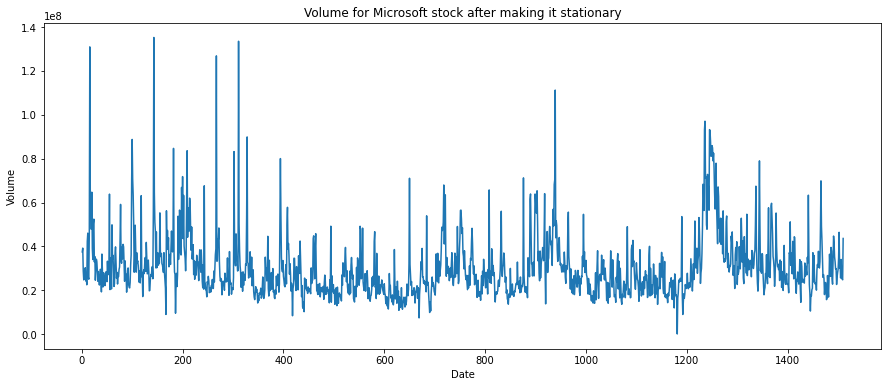

In [ ]:
for col in stat_df.columns[1:]:
  stat_df[col].plot(figsize=(15, 6))
  plt.xlabel("Date")
  plt.ylabel(col)
  plt.title(f"{col} for Microsoft stock after making it stationary")
  plt.show()

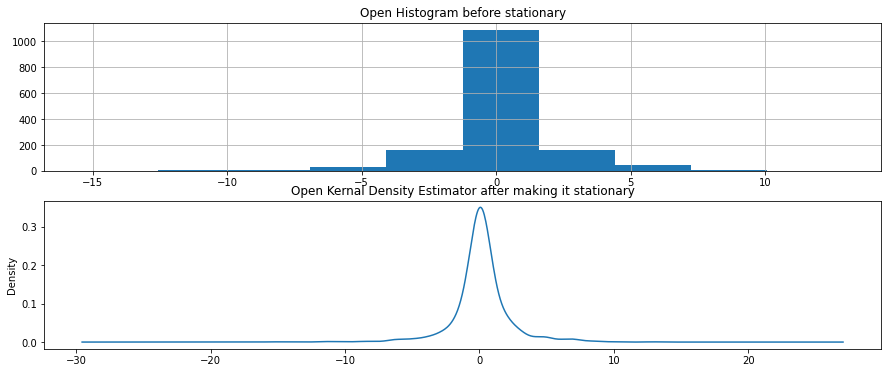

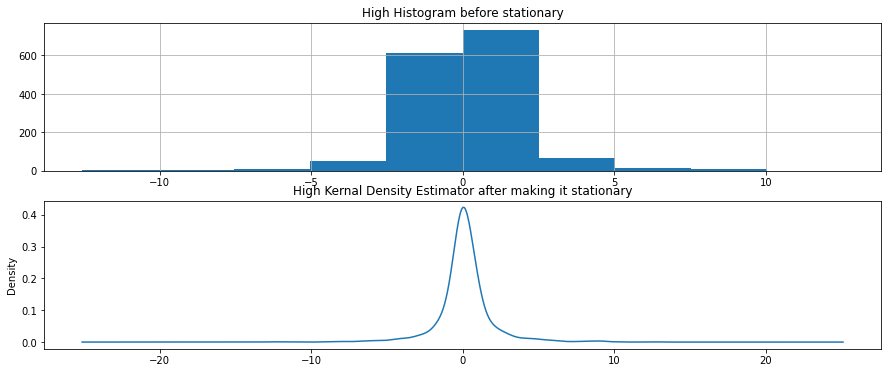

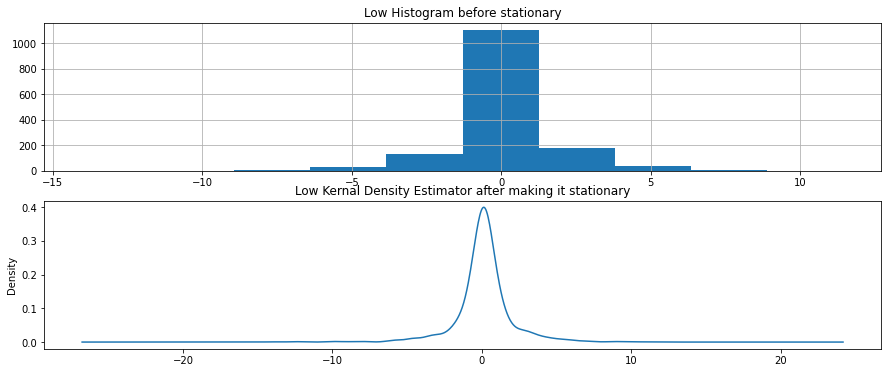

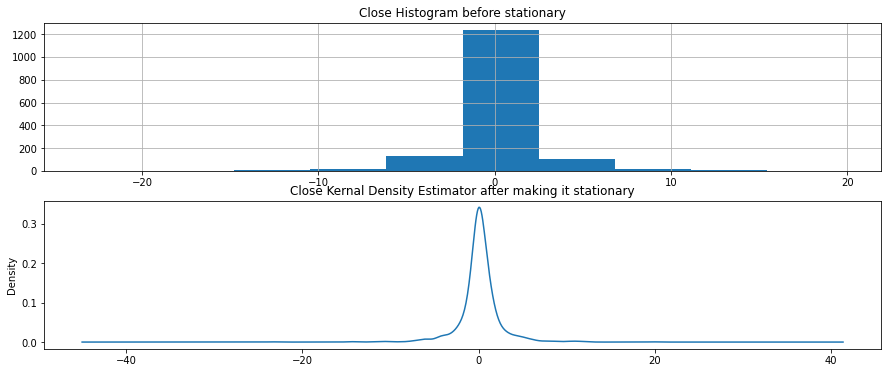

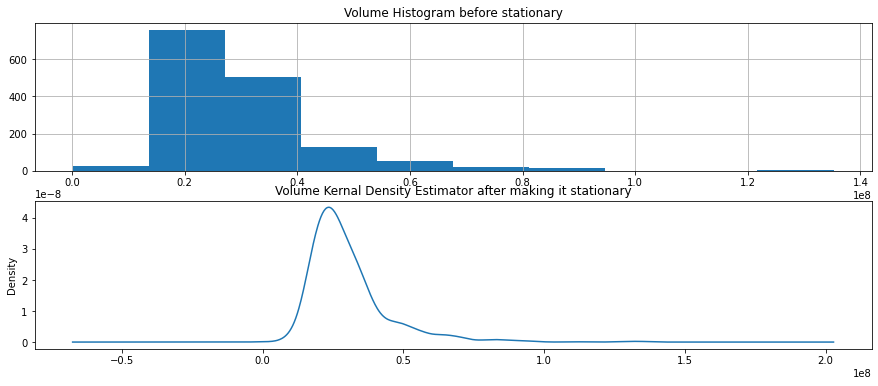

In [ ]:
for col in stat_df.columns[1:]:
  plt.figure(1, figsize=(15,6))
  plt.subplot(211)
  plt.title(f"{col} Histogram before stationary")
  stat_df[col].hist()
  plt.subplot(212)
  stat_df[col].plot(kind='kde')
  plt.title(f"{col} Kernal Density Estimator after making it stationary")
  plt.show()

Make a copy of the data, and let’s perform the test train split.
The train will have all the data except the last 300 days, and the test will contain only the last 300 days to evaluate against the predictions.

In [ ]:
stat_df.shape[0]

1510

In [ ]:
test_split = int(stat_df.shape[0]*0.2)
test_split

302

Let us consider last 300 rows for testing




In [ ]:
test_split = 300

In [ ]:
train, test = stat_df[0:-test_split], stat_df[-test_split:]

In [ ]:
train.head(10)

,Date,Open,High,Low,Close,Volume
1,2015-04-02,0.06,-0.02,-0.19,-0.43,37487476
2,2015-04-06,-0.32,1.04,0.06,1.26,39223692
3,2015-04-07,1.27,0.13,1.13,-0.02,28809375
4,2015-04-08,-0.13,-0.22,-0.27,-0.11,24753438
5,2015-04-09,-0.23,-0.07,0.21,0.06,25723861
6,2015-04-10,0.38,0.33,0.16,0.24,28022002
7,2015-04-13,-0.23,0.11,-0.02,0.04,30276692
8,2015-04-14,0.40,-0.03,0.00,-0.11,24244382
9,2015-04-15,-0.04,0.43,0.29,0.61,27343581
10,2015-04-16,0.19,-0.12,0.14,-0.10,22509652


In [ ]:
print(train.shape)
print(test.shape)

(1210, 6)
(300, 6)


A **cointegration test** is the co-movement among underlying variables over the long run. 

**Cointegration analysis** aims to uncover causal relations among variables by determining if the stochastic trends in a group of variables are shared by the series. If these trends are shared, either one variable causes the other or they are both driven by a third variable.

**Two or more variables are cointegrated if and only if they share common trends.**

Correlation is simply a measure of the degree of mutual association between two or more variables.

We can see that the test says that there is the presence of a long-run relationship between features.

**coint_johansen():**

coint_johansen(endog, det_order, k_ar_diff)

**det_order - int**

-1 - no deterministic terms

0 - constant term

1 - linear trend

**k_ar_diffint - nonnegative**

Number of lagged differences in the model.

The second term in the arguments represents the order of null hypothesis. The third term specifies the number of lagged difference terms used when computing the estimator.

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [ ]:
def cointegration_test(df): 
    res = coint_johansen(df,-1,5) 
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = res.lr1 # Trace statistics
    cvts = res.cvt[:, d[str(1-0.05)]] #Critical values (90%, 95%, 99%) for trace statistic.
    def adjust(val, length= 6): 
        return str(val).ljust(length) #string left justified (ljust)
    print('Column Name   >  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), '> ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)


In [ ]:
cointegration_test(train[stat_df.columns[1:]])

Column Name   >  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Open   >  1638.0    > 60.0627   =>   True
High   >  1104.96   > 40.1749   =>   True
Low    >  609.44    > 24.2761   =>   True
Close  >  219.47    > 12.3212   =>   True
Volume >  7.42      > 4.1296    =>   True


Fit the VAR model for the AR term between 1 to 9 and choose the best AR component, as shown here:

In [ ]:
train[['Open','High','Low','Close','Volume']].head()

,Open,High,Low,Close,Volume
1,0.06,-0.02,-0.19,-0.43,37487476
2,-0.32,1.04,0.06,1.26,39223692
3,1.27,0.13,1.13,-0.02,28809375
4,-0.13,-0.22,-0.27,-0.11,24753438
5,-0.23,-0.07,0.21,0.06,25723861


In [ ]:
for i in [1,2,3,4,5,6,7,8,9]:
    model = VAR(train[['Open','High','Low','Close','Volume']])
    results = model.fit(i)
    print(f'Order : {i}, AIC:  {results.aic}, BIC: { results.bic}')

Order : 1, AIC:  29.096441164851882, BIC: 29.222931210772845
Order : 2, AIC:  28.5706002930276, BIC: 28.802653004796813
Order : 3, AIC:  28.363383941681473, BIC: 28.701139913253805
Order : 4, AIC:  28.25886381343746, BIC: 28.70246394578833
Order : 5, AIC:  28.174963346223468, BIC: 28.724548848273443
Order : 6, AIC:  28.153500821719454, BIC: 28.809213211262364
Order : 7, AIC:  28.122439508591313, BIC: 28.884420613225927
Order : 8, AIC:  28.067051044787103, BIC: 28.935443002852416
Order : 9, AIC:  28.048025114014276, BIC: 29.022970375528345


# **VAR model does not fit for value LAG = 4,6,7,8,9**

To make data stationary, we used Pandas differencing after forecasting 
the results. We need to inverse the result to the original scale. As we don’t 
have a Pandas function for this, let’s define a custom function to inverse 
Pandas differencing.

In [ ]:
def inverse_diff(actual_df, pred_df):
    df_res = pred_df.copy()
    columns = actual_df.columns
    for col in columns: 
        df_res[str(col)+'_1st_inv_diff'] = actual_df[col].iloc[-1] + df_res[str(col)].cumsum()
    return df_res

Autoregressive AR(5) appears to be providing the least Akaike 
Information Criterion (AIC) and Bayesian Information Criterion (BIC), so 
let’s fit and forecast.

AIC and BIC are two ways of scoring a model based on its log 
likelihood and complexity.

In [ ]:
results = model.fit(9)
display(results.summary())
z = results.forecast(y=train[['Open','High','Low','Close','Volume']].values, steps=300)
df_pred = pd.DataFrame(z, columns=['Open','High','Low','Close','Volume'])

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 07, Dec, 2022
Time:                     18:01:30
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    29.0230
Nobs:                     1201.00    HQIC:                   28.4153
Log likelihood:          -25133.6    FPE:                1.51769e+12
AIC:                      28.0480    Det(Omega_mle):     1.25767e+12
--------------------------------------------------------------------
Results for equation Open
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.229851         0.078223            2.938           0.003
L1.Open          -0.862007         0.056287          -15.314           0.000
L1.High          -0.112328         0.062077           -1.810           0.070


Arrange an index for aligning plots, as shown below:

In [ ]:
stat_df.shape[0]

1510

In [ ]:
stat_df.iloc[1509]

Date      2021-03-31 00:00:00
Open                    -0.62
High                     5.25
Low                      1.29
Close                    3.92
Volume               43623471
Name: 1510, dtype: object

In [ ]:
df_pred["new_index"] = range(1210, 1510)
df_pred = df_pred.set_index("new_index")

Let’s inverse the differenced prediction, as shown below:

In [ ]:
res = inverse_diff(stat_df[['Open','High','Low','Close','Volume']],df_pred)

In [ ]:
res

,Open,High,Low,Close,Volume,Open_1st_inv_diff,High_1st_inv_diff,Low_1st_inv_diff,Close_1st_inv_diff,Volume_1st_inv_diff
new_index,,,,,,,,,,
1210,-1.498363,-0.869097,-1.159545,-0.128729,2.863377e+07,-2.118363,4.380903,0.130455,3.791271,7.225724e+07
1211,0.006821,0.099795,0.161077,-0.016576,2.585927e+07,-2.111542,4.480698,0.291532,3.774695,9.811651e+07
1212,0.470173,0.409845,0.178571,0.289817,2.762682e+07,-1.641369,4.890543,0.470103,4.064511,1.257433e+08
1213,-0.050199,0.108756,0.488618,0.539304,2.738876e+07,-1.691568,4.999299,0.958722,4.603816,1.531321e+08
1214,0.431951,0.310560,0.245806,-0.033014,2.646599e+07,-1.259617,5.309859,1.204527,4.570802,1.795981e+08
...,...,...,...,...,...,...,...,...,...,...
1505,0.103397,0.103662,0.102571,0.102956,2.851959e+07,28.702173,35.348237,30.835763,34.430367,8.466532e+09
1506,0.103397,0.103662,0.102571,0.102956,2.851959e+07,28.805571,35.451899,30.938334,34.533323,8.495052e+09
1507,0.103397,0.103662,0.102571,0.102956,2.851959e+07,28.908968,35.555562,31.040906,34.636279,8.523572e+09


Evaluate the results individually, as shown below:

In [ ]:
for i in ['Open','High','Low','Close','Volume']:
    print(f'Evaluation metric for {i}')
    timeseries_evaluation_metrics_func(test[str(i)] , res[str(i)+'_1st_inv_diff'])

Evaluation metric for Open
Evaluation metric results
MSE is : 278.7048055747312
MAE is : 14.173014559343493
RMSE is : 16.694454335938364
MAPE is : inf
R2 is : -14.949690739042797

Evaluation metric for High
Evaluation metric results
MSE is : 494.32282313109454
MAE is : 20.035449508340367
RMSE is : 22.233371834499025
MAPE is : inf
R2 is : -38.673341333368754

Evaluation metric for Low
Evaluation metric results
MSE is : 338.31758397427274
MAE is : 15.866880116059669
RMSE is : 18.393411428396657
MAPE is : inf
R2 is : -24.682717557216503

Evaluation metric for Close
Evaluation metric results
MSE is : 470.7504148897287
MAE is : 19.425988612472064
RMSE is : 21.696783514837602
MAPE is : inf
R2 is : -20.67209354554233

Evaluation metric for Volume
Evaluation metric results
MSE is : 2.4457976641647755e+19
MAE is : 4280719603.7140985
RMSE is : 4945500646.2084055
MAPE is : 14756.135679936364
R2 is : -94867.66324709936



Plot the results, as shown below:

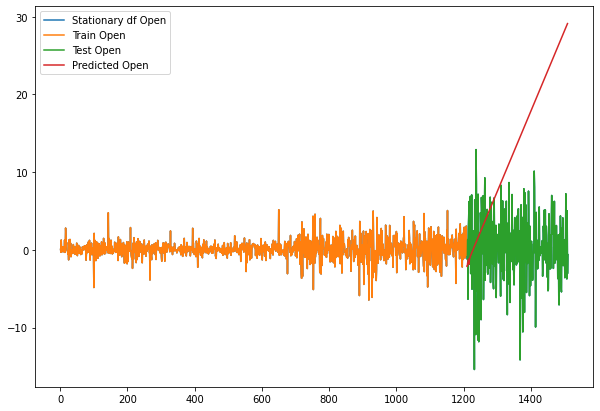

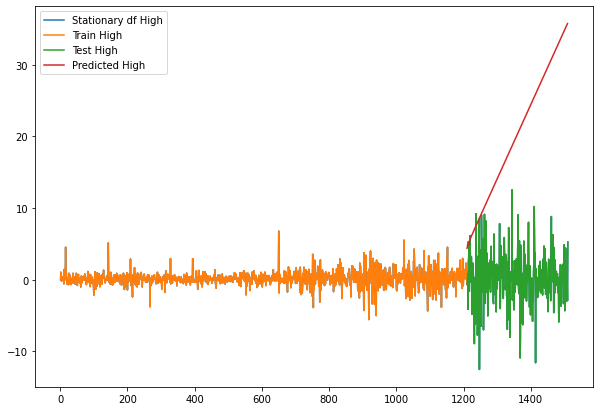

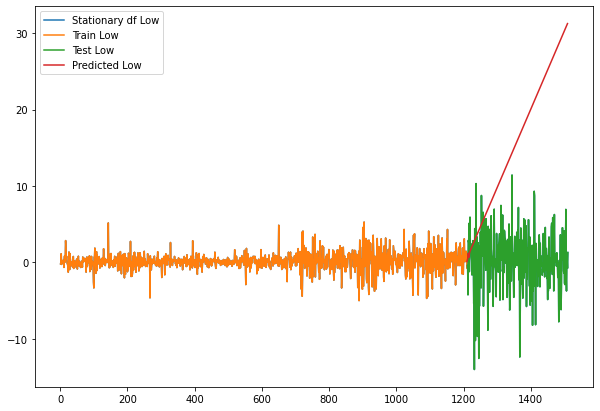

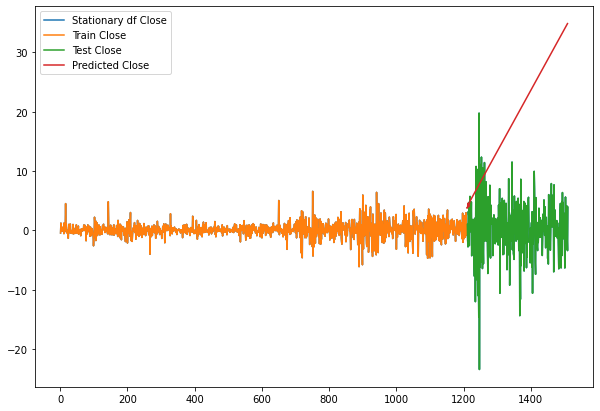

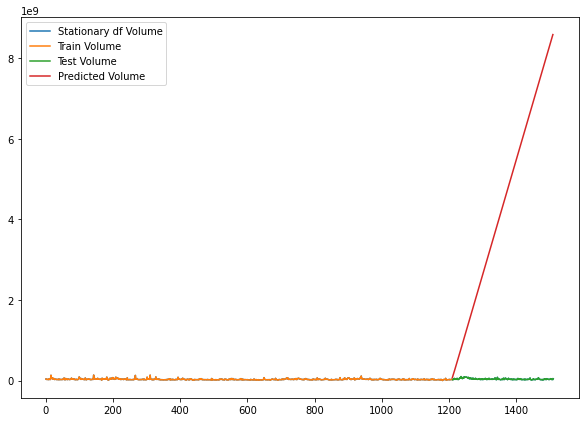

In [ ]:
%matplotlib inline
for col in ['Open','High','Low','Close','Volume']: 
    plt.rcParams["figure.figsize"] = [10,7]
    plt.plot(stat_df[col], label='Stationary df '+col)
    plt.plot( train[col], label='Train '+col)
    plt.plot( test[col], label='Test '+col)
    plt.plot(res[col+'_1st_inv_diff'], label='Predicted '+col)
    plt.legend(loc='best')
    plt.show()